# [Scikit-Learn Classifier Comparison](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)


A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.


In [170]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

# Edited slightly by Austin Welch

#### Imports:

In [1]:
import numpy as np # numpy
import matplotlib.pyplot as plt # plotting
from matplotlib.colors import ListedColormap # Colormap object generated from a list of colors
from sklearn.model_selection import train_test_split # train/test splitter
from sklearn.preprocessing import StandardScaler # standardization
from sklearn.datasets import make_moons, make_circles, make_classification # generate data
from sklearn.neural_network import MLPClassifier # multi-layer Perceptron classifier
from sklearn.neighbors import KNeighborsClassifier # knn classifier
from sklearn.svm import SVC # svm classifier
from sklearn.gaussian_process import GaussianProcessClassifier # GPC based on Laplace approximation
from sklearn.gaussian_process.kernels import RBF # radial basis function kernel
from sklearn.tree import DecisionTreeClassifier # decision tree classifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier # random forest, adaboost
from sklearn.naive_bayes import GaussianNB # gaussian naive bayes classifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis # QDA classifier
%matplotlib inline

#### Create list of classifiers

In [2]:
# list of classifier names (10 total)
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

# classifiers list with parameters
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, hidden_layer_sizes=[100], max_iter=2000), # added last two params to prevent non-converge warning
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

#### Generate data

##### Dataset 1

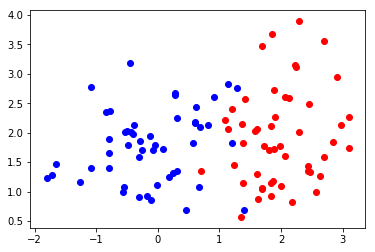

In [3]:
# generate a random n-class classification problem.
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

# add some uniform noise to the two clusters to bring them closer together
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y) # single tuple of (list of lists {X, 100x2},  list (y, 100x1))

# show this data (added, with colors)
x1,x2 = zip(*X)
plt.scatter(np.array(x1)[y==0],np.array(x2)[y==0], c='r')
plt.scatter(np.array(x1)[y==1],np.array(x2)[y==1], c='b')

##### Dataset 2

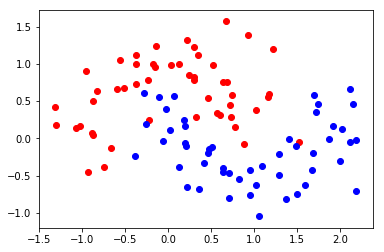

In [4]:
# generate two interleaving half circles
Xmoon, ymoon = make_moons(noise=0.3, random_state=0)

# show this data
x1,x2 = zip(*Xmoon)
plt.scatter(np.array(x1)[ymoon==0],np.array(x2)[ymoon==0], c='r')
plt.scatter(np.array(x1)[ymoon==1],np.array(x2)[ymoon==1], c='b')

##### Dataset 3

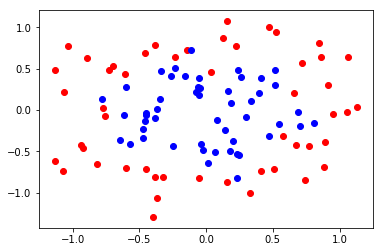

In [5]:
# generate a large circle containing a smaller circle in 2d
Xcirc, ycirc = make_circles(noise=0.2, factor=0.5, random_state=1)

# show this data
x1,x2 = zip(*Xcirc)
plt.scatter(np.array(x1)[ycirc==0],np.array(x2)[ycirc==0], c='r')
plt.scatter(np.array(x1)[ycirc==1],np.array(x2)[ycirc==1], c='b')

##### list of the three datasets (moons, circles easily generated again)

In [8]:
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

##### Main loop

Iterates over each of the three generated datasets, plots the data (train and test data, where test data is semi-transparent), then iterates over each of the 10 classifiers and plots the decision boundaries with the same data overlaid.

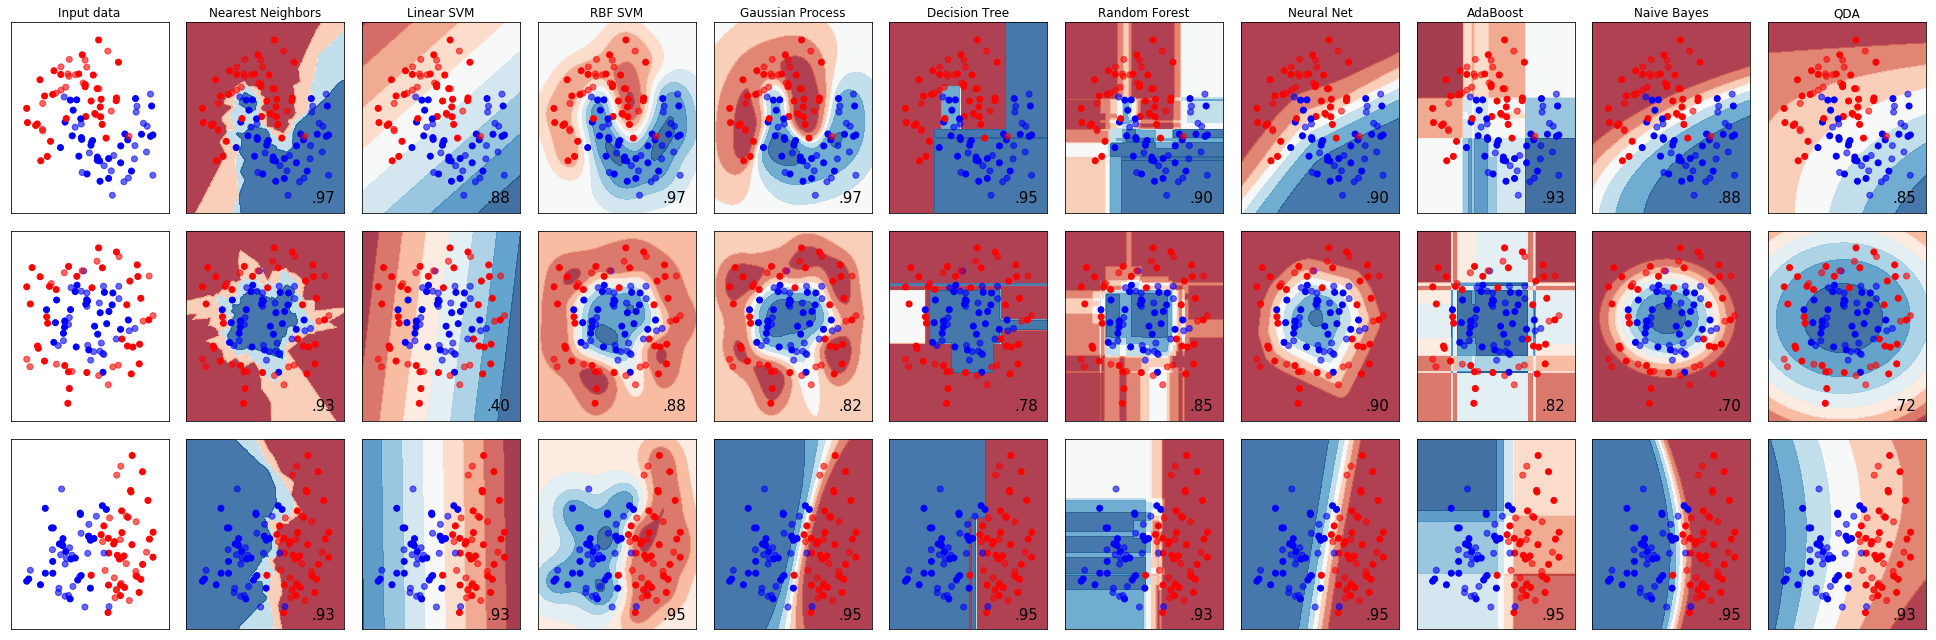

In [9]:
# create figure
figure = plt.figure(figsize=(27, 9))


h = .02  # step size in the mesh 
i = 1 # plot axis number (33 total, 3x11)


# iterate over each dataset
for ds_cnt, ds in enumerate(datasets):
    
    # preprocess dataset, split into training and test part
    X, y = ds 
    X = StandardScaler().fit_transform(X) # determine standardization and apply to data
    # split X and y to 60% train and 40% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

    # create meshgrid of min/max values for each feature dimension, with padding    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 # 1st feature
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 # 2nd feature
    # returns 2-D grid coordinates based on the coordinates contained in vectors x and y. 
    # X is a matrix where each row is a copy of x, 
    # and Y is a matrix where each column is a copy of y.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu # red/blue colormap for filled contour plot backgrounds
    cm_bright = ListedColormap(['#FF0000', '#0000FF']) # colormap for train/test points
    
    # create one axis: nrows, ncols, plot_number  (3, 11, i)
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i) 
    
    if ds_cnt == 0: # title for top of input column
        ax.set_title("Input data")
    
    # plot particule dataset in left-most column
    # Plot the training points (c=y_train is sequence for colors, with cm_bright colormap)
    ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cm_bright)
    # and testing points (test points are semi-transparent)
    ax.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=cm_bright, alpha=0.6)
    # set axis limits from earlier min/max padded values
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    # remove axis ticks
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1 # iterate subplot index

    # iterate over classifiers (each column for particular dataset row, cols 1-11)
    for name, clf in zip(names, classifiers): # simple way to iterate over both with one loop 
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i) # create subplot
        clf.fit(X_train, y_train) # fit classifier to training data for particular dataset
        score = clf.score(X_test, y_test) # predict and score on corresponding test data

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        
        # hasattr: built in function, arguments are an object and a string
        # result is True if the string is the name of one of the object’s attribute
        if hasattr(clf, "decision_function"): # if classifier has decision_function
            
            # ravel reshapes to vector  
            # SVC's predict just uses its decision function, which is distance from the hyperplane. 
            # concatenate vectorized meshgrid outputs (70680, 2)
            # # Z.shape = (70680,)
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) 
                
        else: # if no decision_function, use predicted_proba
            # Z.shape still = (70680,)
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1] # without [:,1] would be (70680,2)

        # Put the result into a color plot
        Z = Z.reshape(xx.shape) # Z.shape = (285, 248)  (xx.shape also = (285, 248))
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8) # filled countour plot with grid by xx,yy and values by Z

        # plot the training points
        ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cm_bright)
        # plot the testing points
        ax.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=cm_bright, alpha=0.6)

        # set axis limits
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        # remove axis ticks
        ax.set_xticks(())
        ax.set_yticks(())
        
        # ds_cnt == 0 => top row
        if ds_cnt == 0:
            ax.set_title(name)
        
        # print score in bottom-right of plot (xpos, ypos, formatted text, size, alignment)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
        # iterate axis number
        i += 1
        
# tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
# This is an experimental feature and may not work for some cases. 
# It only checks the extents of ticklabels, axis labels, and titles.
plt.tight_layout()
# display plot
plt.show() 